In [143]:
import chess
import chess.engine
import random
from collections import defaultdict
from sarfa_saliency import computeSaliencyUsingSarfa
from sys import platform as _platform
from utils import get_all_pos, get_move_obj

In [144]:
engine = chess.engine.SimpleEngine.popen_uci('./stockfish_15_x64_avx2')

In [192]:
from collections import defaultdict

def get_dict_q_vals(board, legal_moves, eval_time, original_move):
    """
    Function returns Q-values in given board position
    Input:
        board: chess.Board()
        legal_moves: List of legal moves of original state
        eval_time: Search time for stockfish
        original_move: original best move (chess.Move()) 
    Output:
        q_vals_dict: Dictionary containing Q-values and Actions
        bestmove: chess.Move() - Best move in given board position
    """
    
    i = 0
    q_vals_dict = {}
    
    
    set_current_legal_moves = set(board.legal_moves)
    set_original_legal_moves = set(legal_moves)
    intersection_set = set_current_legal_moves.intersection(set_original_legal_moves)
    print(intersection_set)

    dict_moves_to_score = defaultdict(int)

    for move in list(intersection_set):
        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=eval_time))
        move_score = 0
        if info["score"].relative.score() is None:
            mate_in_moves = info["score"].is_mate()
            if mate_in_moves > 0:
                move_score = 40
            else:
                move_score = -40
        else:
            move_score = round(info["score"].relative.score()/100.0,2)
        dict_moves_to_score[move] = move_score
        board.pop()

    # print('querying engine with perturbed position')
    # info = engine.analyse(board, chess.engine.Limit(6), multipv=100)
    # # print(evaluation)
    # if original_move is None:
    #     # no initial move supplied
    #     original_move = info[0]["pv"][0]
    # dict_moves_to_score = defaultdict(int)
    
    # print(info)
    # for move_id in info['pv'].keys():
    #     move = info['pv'][move_id][0]
    #     board.push(move)
    #     move_score = 0
    #     if info["score"][move_id].score is None:
    #         mate_in_moves = info["score"][move_id].mate
    #         if mate_in_moves > 0:
    #             # white will win in some number of moves
    #             move_score = 40
    #         else:
    #             # black will win 
    #             move_score = -40
    #     else:
    #         move_score = round(info["score"][move_id].cp/100.0,2)
    #     dict_moves_to_score[move_string] = move_score
    #     board.pop()
    
    # # print(dict_moves_to_score)
    
    print('Total Legal Moves : ', len(intersection_set))

    q_vals_dict = {}
    best_move = None
    best_score = None
    for move, score in dict_moves_to_score.items():
        q_vals_dict[move.uci()] = score
        if best_score is None or score > best_score:
            best_move = move
            best_score = score
    
    return q_vals_dict, best_move

In [202]:
def computeSaliency(FEN = 'rnbq1rk1/pp2bppp/4p3/3p3n/3P1B2/3B1N2/PPPNQPPP/R3K2R w KQkq - 0 1'):
    """
    Function returns saliency map for given board position  
    Input:
        FEN : Board position encoded in a FEN  
    Output:
        answer : Saliency for each location on the board
    """

    print("***********************", FEN, "**********************")
    board = chess.Board(FEN)
    evaltime = 0.5
    legal_moves = list(board.legal_moves)[:]

    # Q-values for original state
    dict_q_values_before_perturbation, original_move  = get_dict_q_vals(board, legal_moves, evaltime, None)
    print('original move = ', original_move)
    
    # Saliency for each board location
    answer = {
        'a1' : {'int': chess.A1, 'saliency': -2},
        'a2' : {'int': chess.A2, 'saliency': -2},
        'a3' : {'int': chess.A3, 'saliency': -2},
        'a4' : {'int': chess.A4, 'saliency': -2},
        'a5' : {'int': chess.A5, 'saliency': -2},
        'a6' : {'int': chess.A6, 'saliency': -2},
        'a7' : {'int': chess.A7, 'saliency': -2},
        'a8' : {'int': chess.A8, 'saliency': -2},
        'b1' : {'int': chess.B1, 'saliency': -2},
        'b2' : {'int': chess.B2, 'saliency': -2},
        'b3' : {'int': chess.B3, 'saliency': -2},
        'b4' : {'int': chess.B4, 'saliency': -2},
        'b5' : {'int': chess.B5, 'saliency': -2},
        'b6' : {'int': chess.B6, 'saliency': -2},
        'b7' : {'int': chess.B7, 'saliency': -2},
        'b8' : {'int': chess.B8, 'saliency': -2},
        'c1' : {'int': chess.C1, 'saliency': -2},
        'c2' : {'int': chess.C2, 'saliency': -2},
        'c3' : {'int': chess.C3, 'saliency': -2},
        'c4' : {'int': chess.C4, 'saliency': -2},
        'c5' : {'int': chess.C5, 'saliency': -2},
        'c6' : {'int': chess.C6, 'saliency': -2},
        'c7' : {'int': chess.C7, 'saliency': -2},
        'c8' : {'int': chess.C8, 'saliency': -2},
        'd1' : {'int': chess.D1, 'saliency': -2},
        'd2' : {'int': chess.D2, 'saliency': -2},
        'd3' : {'int': chess.D3, 'saliency': -2},
        'd4' : {'int': chess.D4, 'saliency': -2},
        'd5' : {'int': chess.D5, 'saliency': -2},
        'd6' : {'int': chess.D6, 'saliency': -2},
        'd7' : {'int': chess.D7, 'saliency': -2},
        'd8' : {'int': chess.D8, 'saliency': -2},
        'e1' : {'int': chess.E1, 'saliency': -2},
        'e2' : {'int': chess.E2, 'saliency': -2},
        'e3' : {'int': chess.E3, 'saliency': -2},
        'e4' : {'int': chess.E4, 'saliency': -2},
        'e5' : {'int': chess.E5, 'saliency': -2},
        'e6' : {'int': chess.E6, 'saliency': -2},
        'e7' : {'int': chess.E7, 'saliency': -2},
        'e8' : {'int': chess.E8, 'saliency': -2},
        'f1' : {'int': chess.F1, 'saliency': -2},
        'f2' : {'int': chess.F2, 'saliency': -2},
        'f3' : {'int': chess.F3, 'saliency': -2},
        'f4' : {'int': chess.F4, 'saliency': -2},
        'f5' : {'int': chess.F5, 'saliency': -2},
        'f6' : {'int': chess.F6, 'saliency': -2},
        'f7' : {'int': chess.F7, 'saliency': -2},
        'f8' : {'int': chess.F8, 'saliency': -2},
        'g1' : {'int': chess.G1, 'saliency': -2},
        'g2' : {'int': chess.G2, 'saliency': -2},
        'g3' : {'int': chess.G3, 'saliency': -2},
        'g4' : {'int': chess.G4, 'saliency': -2},
        'g5' : {'int': chess.G5, 'saliency': -2},
        'g6' : {'int': chess.G6, 'saliency': -2},
        'g7' : {'int': chess.G7, 'saliency': -2},
        'g8' : {'int': chess.G8, 'saliency': -2},
        'h1' : {'int': chess.H1, 'saliency': -2},
        'h2' : {'int': chess.H2, 'saliency': -2},
        'h3' : {'int': chess.H3, 'saliency': -2},
        'h4' : {'int': chess.H4, 'saliency': -2},
        'h5' : {'int': chess.H5, 'saliency': -2},
        'h6' : {'int': chess.H6, 'saliency': -2},
        'h7' : {'int': chess.H7, 'saliency': -2},
        'h8' : {'int': chess.H8, 'saliency': -2},

        }
    
    # Iteratively perturb each feature on the board
    # Note : Perturbations should be valid. Code for avoiding those cases.
    
    for square_string in sorted(answer.keys()):
        entry = answer[square_string]
        entry_keys = ['saliency', 'dP', 'K', 'QMaxAnswer', 'actionGapBeforePerturbation', 'actionGapAfterPerturbation']
        print('perturbing square = ', square_string)
        # perturb board
        piece_removed = board.remove_piece_at(entry['int'])
        
        if piece_removed is None:
            # square was empty, so proceed without changing anything
            print('square was empty, so skipped')
            # print(board)
            print('------------------------------------------')
        
            continue
        
        elif (piece_removed == chess.Piece(6,True) or piece_removed == chess.Piece(6,False)) or board.was_into_check():
            # illegal piece was removed
            print('illegal piece was removed')
            for key in entry_keys:
                entry[key] = 0
        else:
            # set perturbed state

            # Check if the original move is still valid
            if board.is_legal(original_move):
                # Find the q values 
                dict_q_values_after_perturbation, _ = get_dict_q_vals(board, legal_moves, evaltime, original_move)
                
                # Compute saliency using sarfa_saliency methods
                entry['saliency'], entry['dP'], entry['K'], entry['QMaxAnswer'],\
                    entry['actionGapBeforePerturbation'], entry['actionGapAfterPerturbation']\
                         = computeSaliencyUsingSarfa(str(original_move), dict_q_values_before_perturbation, dict_q_values_after_perturbation)
                print('saliency for this square = ', entry)
                
            else:
                # illegal original move in perturbed state, therefore piece removed is probably important 
                # print(board.is_legal(original_move))
                # print(board)
                print('original move illegal in perturbed state')
                for key in entry_keys:
                    entry[key] = -1
                entry['saliency'] = 1 
                
        # undo perturbation
        print('------------------------------------------')
                
        board.set_piece_at(entry['int'], piece_removed)
        

    print(answer)
    return(answer)

In [203]:
# Cell for displaying board position

from IPython.display import Image, display
import cairosvg
import cv2
import svg_custom.svg_custom as svg_custom 
import matplotlib.pyplot as plt
import numpy as np

# Few utility functions
def svg_to_png(img):
    '''
    Converts given svg image to png
    Input : 
        img : image in .svg format 
    Output :
        svg_custom/board.png
        Display of image
    '''
    with open('svg_custom/board.svg', 'w+') as f:
        f.write(img)
    cairosvg.svg2png(url='svg_custom/board.svg', write_to='svg_custom/board.png')
    display(Image(filename='svg_custom/board.png'))

def display_board(board):
    '''
    Displaying given board
    Input : 
        board : chess.Board
    Output :
        svg_custom/board.png
        Display of image     
    '''
    img = svg_custom.board(board)
    svg_to_png(img)
    
def return_bestmove(board, eval_time = 2):
    '''
    Returns and displays best move for a given chess position
    Input :
        board : chess.Board
    Output :
        bestmove : chess.Move 
    '''
    options = engine.analyse(board, chess.engine.Limit(time=eval_time), multipv=100)
    # engine.position(board)
    bestmove = str(options[0]["pv"][0])
    from_square, to_square = get_move_obj(bestmove[:2]), get_move_obj(bestmove[2:])
    print('Best move is', bestmove)
    
    
    svg_w_arrow = svg_custom.board(board, arrows = [svg_custom.Arrow(tail =  from_square, head = to_square, color = '#e6e600')])
    
    svg_to_png(svg_w_arrow)
    
    return bestmove

def explanation(board):
    '''
    Generates explanation of the best move for given board position using SARFA
    
    Input :
        board = chess.Board
    Output :
        prints piecewise saliency
        svg_custom/board.png
    '''
    
    options = engine.analyse(board, chess.engine.Limit(time=6), multipv=100)
    # engine.position(board)
    bestmove = options[0]["pv"][0]

    # Evaluation of board position for best move
    evaluation = computeSaliency(chess.Board.fen(board))

    return evaluation, bestmove 

def generate_heatmap(evaluation, bestmove):
    """
    Generates heatmap for  saliency evaluation of the best move

    """
    # Laying the saliency map over the board
    heatmap = np.zeros((8, 8))
    for position in evaluation:
        x, y = evaluation[position]['int']//8, evaluation[position]['int'] % 8
        heatmap[x, y] = evaluation[position]['saliency']
    heatmap = np.flipud(heatmap)
    

    #### Saliency map overlaid on board
    svg = svg_custom.board(board, arrows = [svg_custom.Arrow(tail =  bestmove.from_square, head = bestmove.to_square, color = '#e6e600')])

    with open('svg_custom/board.svg', 'w+') as f:
        f.write(svg)
    cairosvg.svg2png(url='svg_custom/board.svg', write_to='svg_custom/board.png')

    # original board as a numpy array
    board_array = cv2.imread('svg_custom/board.png')

    threshold = (100/256)*np.max(heatmap) # percentage threshold. Saliency values above this threshold won't be mapped onto board

    # Create bounding boxes with saliency colours for every square on chess board
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            ii = 45*i+20
            jj = 45*j+20
            value_of_square =  heatmap[i, j]
            if value_of_square < threshold:
                continue
            for box_i in range(ii, ii+44, 1):
                for box_j in range(jj, jj+44, 1):
                    if box_i > ii+4 and box_i < ii+40 and box_j > jj+4 and box_j < jj+40:
                        continue
                    board_array[box_i, box_j, 0] = 256 - 0.8*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)
                    board_array[box_i, box_j, 1] = 256 - 0.84*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)
                    board_array[box_i, box_j, 2] = 256 - 0.19*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)

    cv2.imwrite("svg_custom/board.png", board_array)
    print('------------===============------------===============\n\n')
    display(Image('svg_custom/board.png'))
    print('\n\n------------===============------------===============')

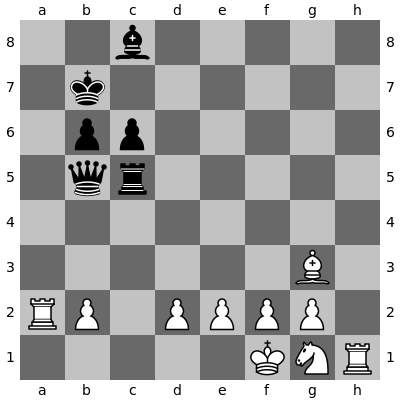

In [207]:
# FEN = '2r1r1k1/b4ppp/p3p3/Pp2Nq2/1Pbp1B2/R7/2PQ1PP1/4R1K1 w - - 0 1'
FEN = "2b5/1k6/1pp5/1qr5/8/6B1/RP1PPPP1/5KNR w - - 2 2"
# Visulaize the board
board = chess.Board(FEN)
display_board(board)

# Show the Move

Best move is h1h7


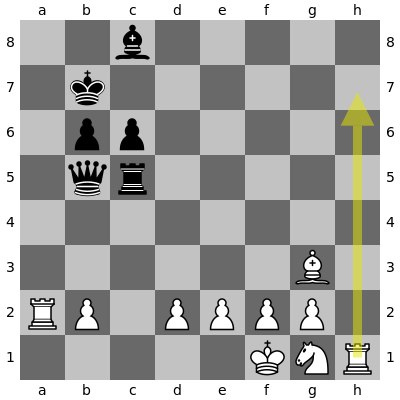

In [208]:
bestmove = return_bestmove(board)


# Explanation

*********************** 2b5/1k6/1pp5/1qr5/8/6B1/RP1PPPP1/5KNR w - - 2 2 **********************
{Move.from_uci('g1h3'), Move.from_uci('a2a6'), Move.from_uci('a2a4'), Move.from_uci('g3c7'), Move.from_uci('b2b4'), Move.from_uci('f2f4'), Move.from_uci('a2a7'), Move.from_uci('h1h7'), Move.from_uci('g3e5'), Move.from_uci('h1h5'), Move.from_uci('d2d4'), Move.from_uci('g1f3'), Move.from_uci('h1h8'), Move.from_uci('a2a5'), Move.from_uci('a2a1'), Move.from_uci('h1h2'), Move.from_uci('h1h3'), Move.from_uci('g3f4'), Move.from_uci('h1h6'), Move.from_uci('g3b8'), Move.from_uci('g3h4'), Move.from_uci('f2f3'), Move.from_uci('a2a8'), Move.from_uci('b2b3'), Move.from_uci('a2a3'), Move.from_uci('f1e1'), Move.from_uci('g3d6'), Move.from_uci('h1h4'), Move.from_uci('g3h2'), Move.from_uci('d2d3')}
Total Legal Moves :  30
original move =  g1h3
perturbing square =  a1
square was empty, so skipped
------------------------------------------
perturbing square =  a2
{Move.from_uci('g1h3'), Move.from_uci('g3c7'), M

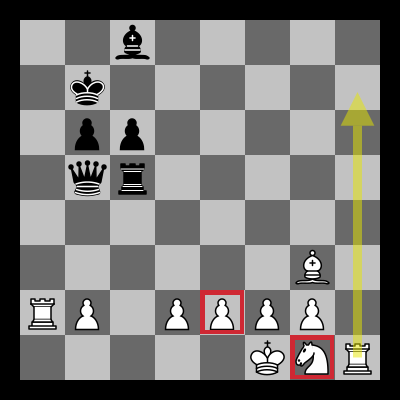



------------===============------------===============


In [209]:
evaluation, bestmove = explanation(board)
generate_heatmap(evaluation, bestmove)

In [185]:
bestmove

'g2g4'